#  Unsupervised Methods
    - Small Data Exploration
    - Clustering
        - K-Means
        - Gaussian Mixture Models (GMM)
        - Heirarchial Clustering

In [1]:
import pandas as pd
import numpy as np
import sklearn.metrics as sm
import matplotlib.pyplot as plt
import seaborn as sns
import python_utils
import os, sys
import sys
from time import time
from IPython.display import display
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn import cluster, datasets
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.model_selection import cross_val_score
from sklearn.tree import export_graphviz

In [2]:
plt.style.use('seaborn-white')
#warnings.filterwarnings('ignore')

In [3]:
# https://www.kaggle.com/arjunbhasin2013/ccdata
df= pd.read_csv('data/CC_GENERAL.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
df.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [5]:
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [6]:
#df= df.fillna(df.median())
df = df.dropna()
df.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [7]:
df.drop(df.columns[0], inplace=True, axis=1)

BALANCE                              2.374254
BALANCE_FREQUENCY                   -2.084161
PURCHASES                            8.055789
ONEOFF_PURCHASES                     9.935776
INSTALLMENTS_PURCHASES               7.216133
CASH_ADVANCE                         5.139629
PURCHASES_FREQUENCY                  0.033041
ONEOFF_PURCHASES_FREQUENCY           1.504234
PURCHASES_INSTALLMENTS_FREQUENCY     0.487753
CASH_ADVANCE_FREQUENCY               1.795915
CASH_ADVANCE_TRX                     5.673327
PURCHASES_TRX                        4.578418
CREDIT_LIMIT                         1.507019
PAYMENTS                             5.873049
MINIMUM_PAYMENTS                    13.622193
PRC_FULL_PAYMENT                     1.886027
TENURE                              -3.011141
dtype: float64

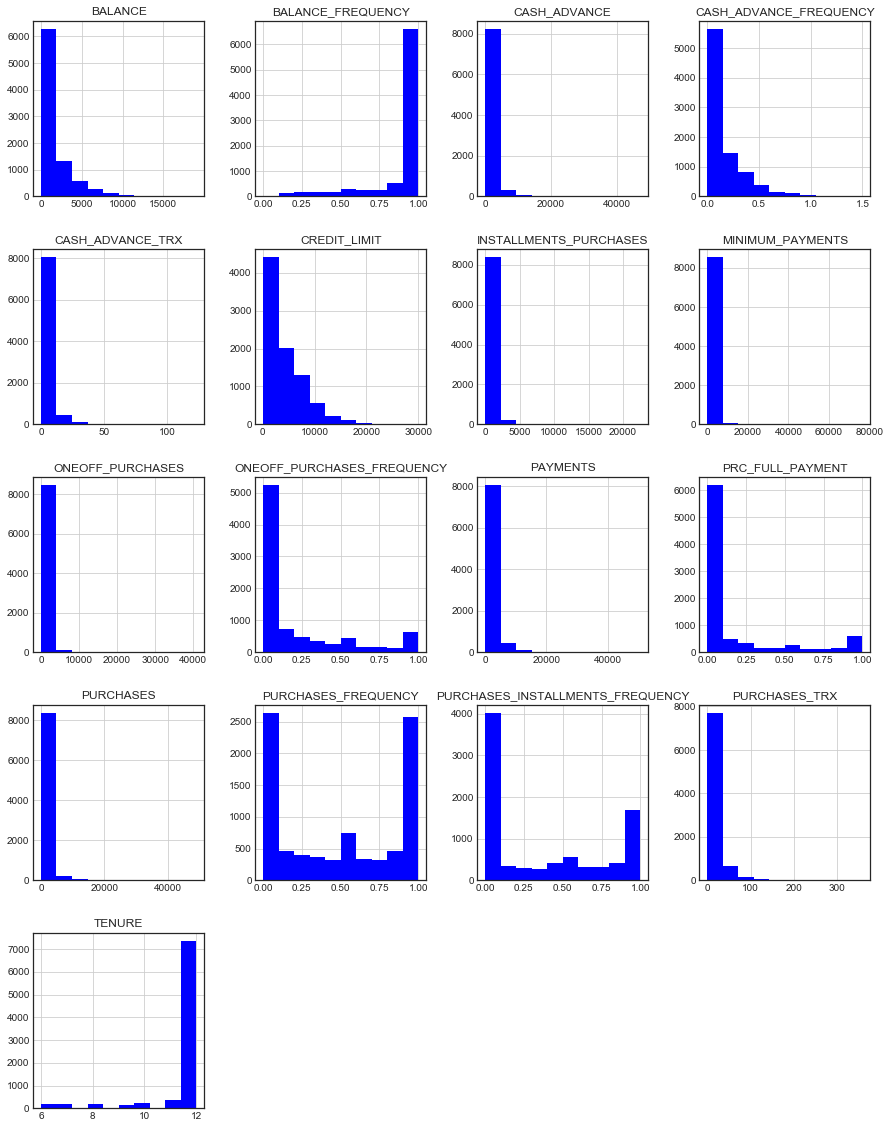

In [8]:
df.hist(figsize=(15,20),color='b')
pd.DataFrame.skew(df, axis=0)

In [9]:
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

# Unsupervised Model
## Clustering
### K-means

In [10]:
df[['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']] = df[['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']].values.astype('float64')

In [11]:
df=df.replace(' ', '') 

In [12]:
X =  df.loc[:,['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']]  
y = df.loc[:,['ONEOFF_PURCHASES']]

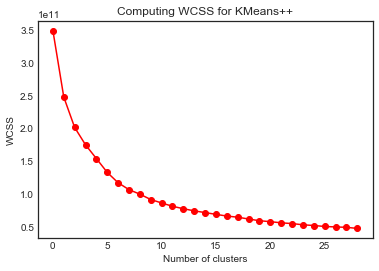

In [13]:
vals = df.iloc[ :, 1:].values

from sklearn.cluster import KMeans
# Use the Elbow method to find a good number of clusters using WCSS
wcss = []
for ii in range( 1, 30 ):
    kmeans = KMeans(n_clusters=ii, init="k-means++", n_init=10, max_iter=300) 
    kmeans.fit_predict( vals )
    wcss.append( kmeans.inertia_ )
    
plt.plot( wcss, 'ro-', label="WCSS")
plt.title("Computing WCSS for KMeans++")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [14]:
from sklearn.preprocessing import normalize
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import scale
from sklearn import preprocessing
X = preprocessing.scale(X) # standardize the data attributes
#Normalizer().fit(X)
#X= nomalize(X)

In [15]:
X = X.astype('int')

In [16]:
# Initializing KMeans
kmeans = KMeans(n_clusters=3)
# Fitting with inputs
kmeans = kmeans.fit(X)
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_

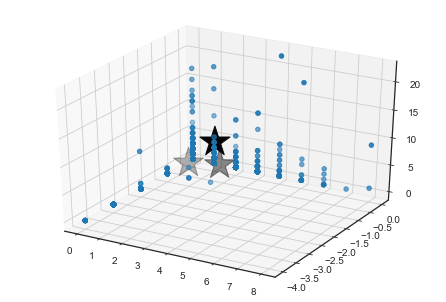

In [17]:
fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(X[:, 0], X[:, 1], X[:, 2])#, c = y)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c='#050505', s=1000)

Text(0.5, 1.0, 'K=4, J=50823.19')

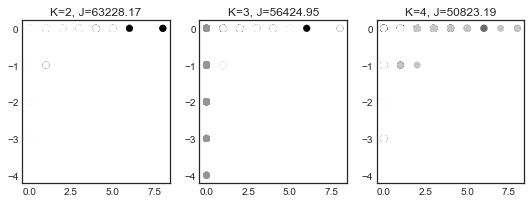

In [18]:
from sklearn.cluster import KMeans
from sklearn import cluster, datasets
import matplotlib.pyplot as plt
import seaborn as sns # nice color
%matplotlib inline

km2 = cluster.KMeans(n_clusters=2).fit(X)
km3 = cluster.KMeans(n_clusters=3).fit(X)
km4 = cluster.KMeans(n_clusters=4).fit(X)

plt.figure(figsize=(9, 3))
plt.subplot(131)
plt.scatter(X[:, 0], X[:, 1], c=km2.labels_)
plt.title("K=2, J=%.2f" % km2.inertia_)

plt.subplot(132)
plt.scatter(X[:, 0], X[:, 1], c=km3.labels_)
plt.title("K=3, J=%.2f" % km3.inertia_)

plt.subplot(133)
plt.scatter(X[:, 0], X[:, 1], c=km4.labels_)#.astype(np.float))
plt.title("K=4, J=%.2f" % km4.inertia_)

### GMM (Gaussian Misture Models)

In [19]:
bic = list() #print(X)
ks = np.arange(1, 10)
for k in ks: 
    gmm = GaussianMixture(n_components=k, covariance_type='full') 
    gmm.fit(X) 
    bic.append(gmm.bic(X))

Choose k= 9


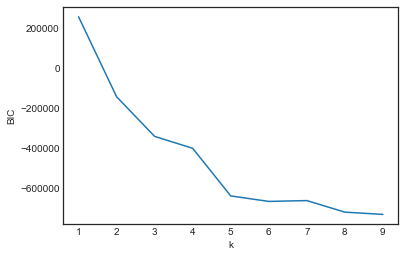

In [20]:
k_chosen = ks[np.argmin(bic)]
plt.plot(ks, bic) 
plt.xlabel("k") 
plt.ylabel("BIC")
print("Choose k=", k_chosen)

Text(0.5, 1.0, 'K=4')

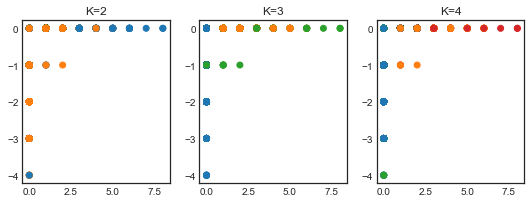

In [21]:
gmm2 = GaussianMixture(n_components=2, covariance_type='full').fit(X)
gmm3 = GaussianMixture(n_components=3, covariance_type='full').fit(X)
gmm4 = GaussianMixture(n_components=4, covariance_type='full').fit(X)

colors = sns.color_palette()

plt.figure(figsize=(9, 3))

plt.subplot(131)
plt.scatter(X[:, 0], X[:, 1], c=[colors[lab] for lab in gmm2.predict(X)])
plt.title("K=2")

plt.subplot(132)
plt.scatter(X[:, 0], X[:, 1], c=[colors[lab] for lab in gmm3.predict(X)])
plt.title("K=3")

plt.subplot(133)
plt.scatter(X[:, 0], X[:, 1], c=[colors[lab] for lab in gmm4.predict(X)]) # .astype(np.float))
plt.title("K=4")

### HIERARCHICAL CLUSTERNING 

As the scipy linkage docs tell us, 'ward' is one of the methods that can be used to calculate the distance between newly formed clusters. 'ward' causes linkage() to use the Ward variance minimization algorithm.

In [22]:
%matplotlib inline
np.set_printoptions(precision=5, suppress=True)  # suppress scientific float notation

# generate the linkage matrix
Z = linkage(X, 'ward')
print(Z[0])

c, coph_dists = cophenet(Z, pdist(X))
print(c)

[0. 4. 0. 2.]
0.556807351018986


Result's format: [idx1, idx2, dist, sample_count]

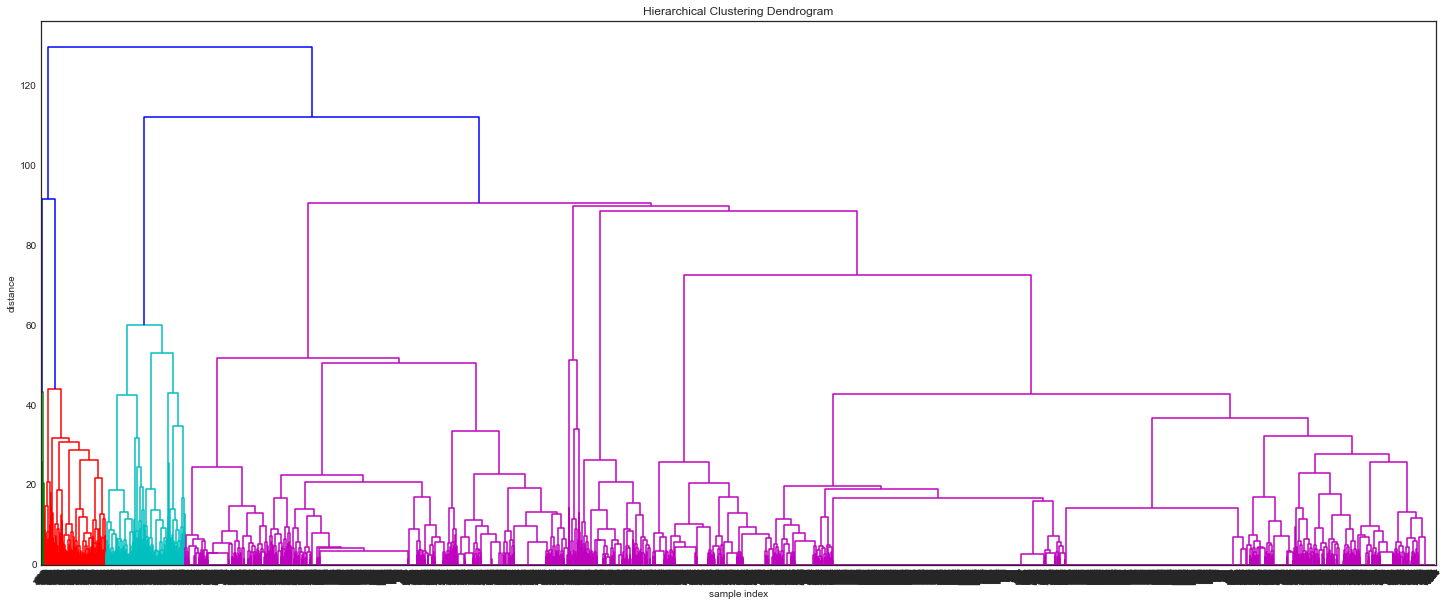

In [24]:
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(Z,
           leaf_rotation=50.,  # rotates the x axis labels
           leaf_font_size=8.,  # font size for the x axis labels
          )
plt.show()

[13 13  6 ... 11 11 11]


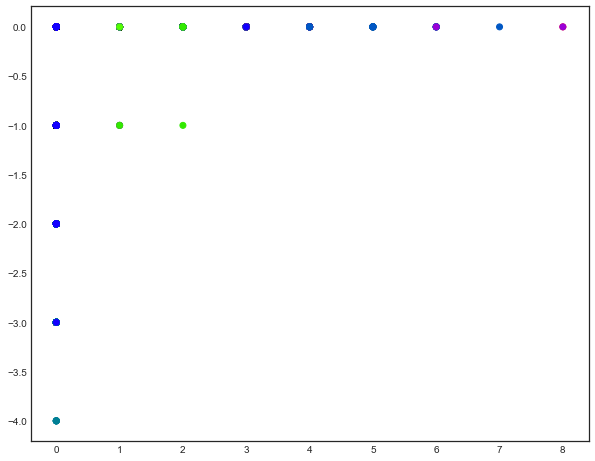

In [25]:
max_d = 50
clusters = fcluster(Z, max_d, criterion='distance')
print(clusters)

plt.figure(figsize=(10, 8))
plt.scatter(X[:,0], X[:,1], c=clusters, cmap='prism')  # plot points with cluster dependent colors
plt.show()

Text(0.5, 1.0, 'K=4')

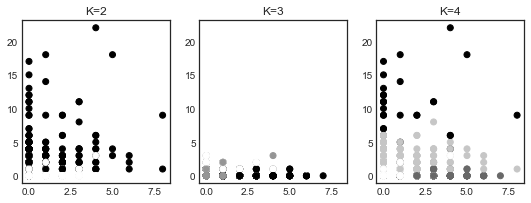

In [26]:
ward2 = cluster.AgglomerativeClustering(n_clusters=2, linkage='ward').fit(X)
ward3 = cluster.AgglomerativeClustering(n_clusters=3, linkage='ward').fit(X)
ward4 = cluster.AgglomerativeClustering(n_clusters=4, linkage='ward').fit(X)

plt.figure(figsize=(9, 3))

plt.subplot(131)
plt.scatter(X[:, 0], X[:, 2], c=ward2.labels_)
plt.title("K=2")

plt.subplot(132)
plt.scatter(X[:, 0], X[:, 2], c=ward3.labels_)
plt.title("K=3")

plt.subplot(133)
plt.scatter(X[:, 0], X[:, 2], c=ward4.labels_) # .astype(np.float))
plt.title("K=4")